In [ ]:
#END-TO-END DATA SCIENCE PIPELINE
import numpy as np #
import pandas as pd #to read data

import matplotlib.pyplot as plt #to visualise
import seaborn as sns  #to visualise


from scipy import stats #for scientific python operations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import(
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

import warnings
warnings. filterwarnings("ignore")

sns.set (style="whitegrid")
plt.rcParams ["figure.figsize"] = (10,5)

In [ ]:
df_raw = pd.read_csv("/content/Titanic-Dataset.csv")
df = df_raw.copy()

In [ ]:
# Data Cleaning(Production Grade)

#Standardize Column Names

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ","_")
)

In [ ]:
#Fix Data Types

df['survived'] = df['survived'].astype(int)
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

In [ ]:
#missing Value Treatment

#age - Median
df['age'] = df['age'].fillna(df['age'].median())

#embarked - Mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode([0]))

#cabin - drop(Too Sparse)
df.drop(columns = ['cabin'], inplace= True)

In [ ]:
#Duplicate Handling
df.drop_duplicates(inplace = True)

In [ ]:
#Outlier Treatment(capping)
Q1 =df['fare'].quantile(0.25)
Q3 =df['fare'].quantile(0.75)
IQR = Q3-Q1

upper = Q3 + 1.5 * IQR

df['fare'] = np.where(df['fare']> upper, upper, df['fare'])

In [ ]:
#Features Enginnering

#Create new Features

df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = np.where(df['family_size'] == 1,1,0)

In [ ]:
#Encoding ML ready

df['sex'] = df['sex'].map({'male' :0, 'female' :1})
df['embarked'] = df['embarked'].map({'S':0, 'C':1, 'Q':2})

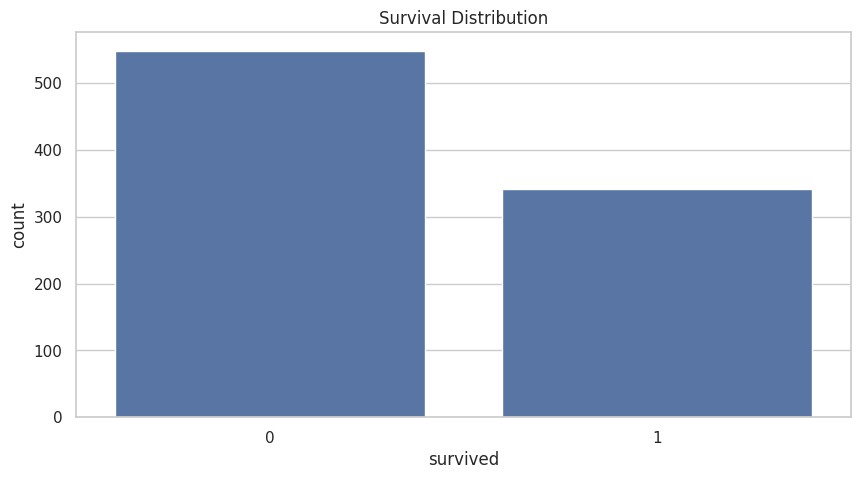

In [ ]:
#Exploratory Data Analysis

#Target Distribution
sns.countplot(x ='survived', data= df)
plt.title("Survival Distribution")
plt.show()

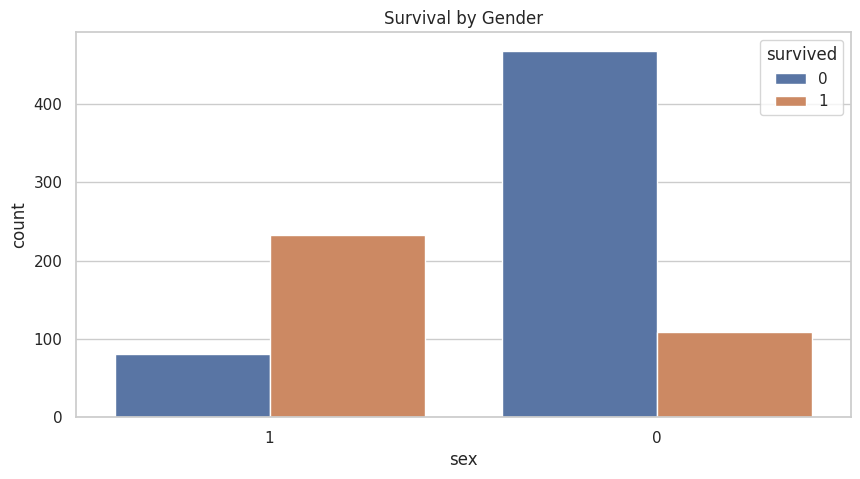

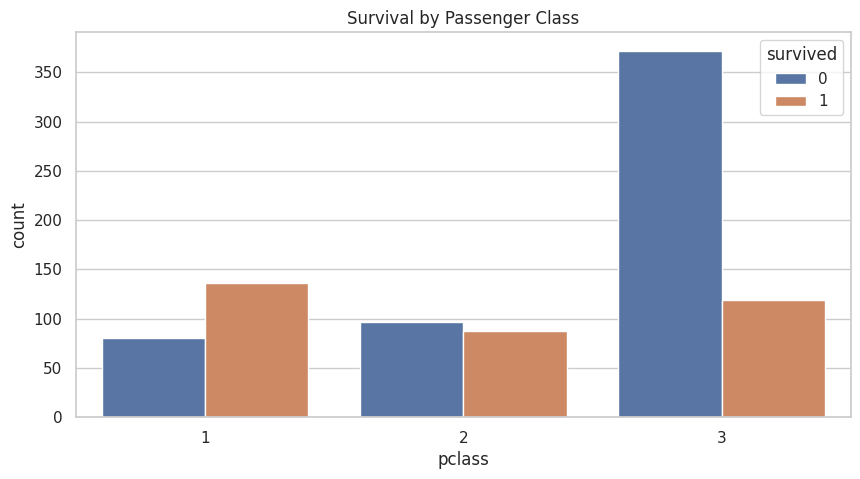

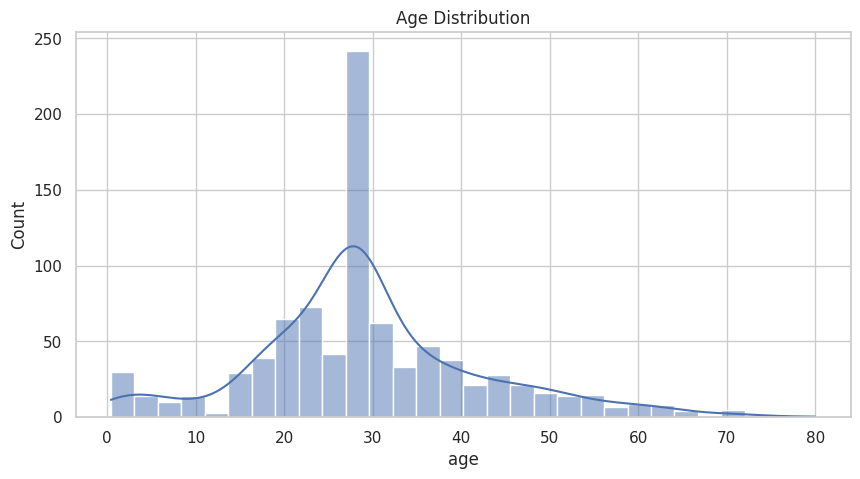

In [ ]:
#Gender vs Survival

sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()

#class vs Survival
sns.countplot(x='pclass',hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

#Age Distribution
sns.histplot(df['age'], bins=30, kde = True)
plt.title("Age Distribution")
plt.show()

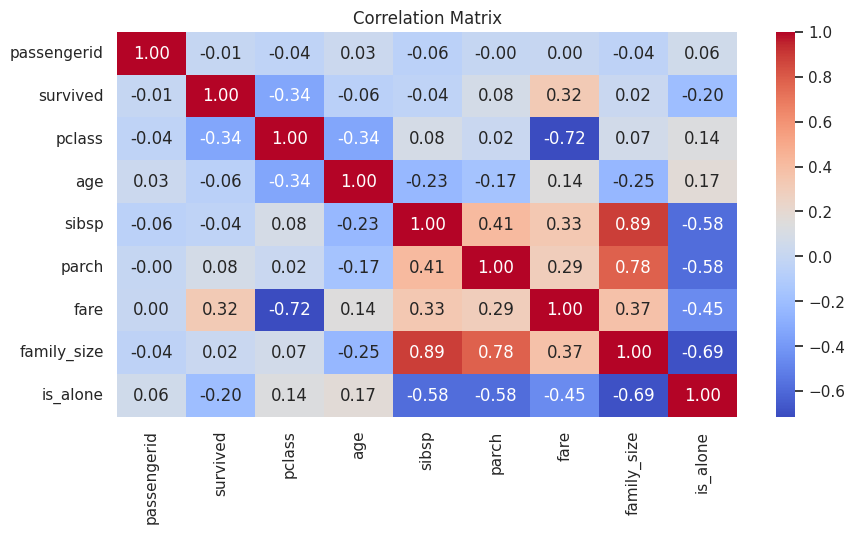

In [ ]:
#correlation heatmap
corr = df.select_dtypes(include ='number').corr()

sns.heatmap(corr, annot = True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
#Machine Learning Pipeline

#feature Selection
features =[
    'pclass', 'sex', 'age','fare',
    'family_size', 'is_alone', 'embarked'
]

X =df[features]
y =df['survived']

# Ensure X does not contain NaN values before splitting and scaling
# This addresses the ValueError from LogisticRegression if NaNs are present
X = X.dropna()
# Align y with X after dropping rows
y = y.loc[X.index]

#train-test Split
X_train , X_test, y_train, y_test = train_test_split(
    X , y, test_size = 0.2, random_state = 42, stratify = y
)

#feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Moddel Training(Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

#predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]